# Import

In [1]:
%matplotlib inline
import requests
from lxml import html
from datetime import datetime as dt
import numpy as np
from matplotlib import pyplot as plt

In [2]:
res = requests.get("http://www.koeri.boun.edu.tr/scripts/lst9.asp")
tx = html.fromstring(res.content).xpath("//pre/text()")[0]
lines = tx.splitlines()[7:]  # get rid of the headers

# take out timestamps and convert them to "hours since first event"
timestamps = [dt.strptime(l[:19], "%Y.%m.%d %H:%M:%S") for l in lines if "ISTANBUL" in l]
t = np.array([(x - timestamps[-1]).total_seconds() / 3600 for x in timestamps])[::-1]

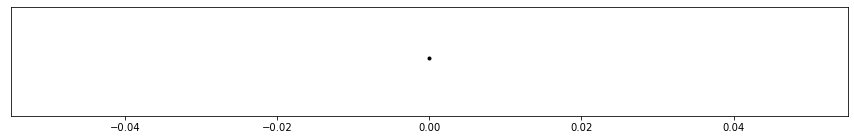

In [3]:
plt.figure(figsize=(15,2))
plt.ylim([-5, 5])
plt.yticks([])
_ = plt.plot(t, np.random.rand(len(t)), 'k.')

In [7]:
import setuptools
from distutils.core import setup

In [9]:
!pip install hawkeslib

  Using cached hawkeslib-0.2.2.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [38 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\hawkeslib
  copying hawkeslib\__init__.py -> build\lib.win-amd64-3.8\hawkeslib
  creating build\lib.win-amd64-3.8\hawkeslib\model
  copying hawkeslib\model\model.py -> build\lib.win-amd64-3.8\hawkeslib\model
  copying hawkeslib\model\mv_exp.py -> build\lib.win-amd64-3.8\hawkeslib\model
  copying hawkeslib\model\poisson.py -> build\lib.win-amd64-3.8\hawkeslib\model
  copying hawkeslib\model\uv_bayes.py -> build\lib.win-amd64-3.8\hawkeslib\model
  copying hawkeslib\model\uv_exp.py -> build\lib.win-amd64-3.8\hawkeslib\model
  copying hawkeslib\model\__init__.py -> build\lib.win-amd64-3.8\hawkeslib\model
  creating build\lib.win-amd64-3.8\hawkeslib\model\c
  copying hawkeslib\model\c\__init__.py -> build\lib.win-

  Running setup.py clean for hawkeslib
Failed to build hawkeslib
  Running setup.py install for hawkeslib: started
  Running setup.py install for hawkeslib: finished with status 'error'



  copying hawkeslib\__init__.py -> build\lib.win-amd64-3.8\hawkeslib
  creating build\lib.win-amd64-3.8\hawkeslib\model
  copying hawkeslib\model\model.py -> build\lib.win-amd64-3.8\hawkeslib\model
  copying hawkeslib\model\mv_exp.py -> build\lib.win-amd64-3.8\hawkeslib\model
  copying hawkeslib\model\poisson.py -> build\lib.win-amd64-3.8\hawkeslib\model
  copying hawkeslib\model\uv_bayes.py -> build\lib.win-amd64-3.8\hawkeslib\model
  copying hawkeslib\model\uv_exp.py -> build\lib.win-amd64-3.8\hawkeslib\model
  copying hawkeslib\model\__init__.py -> build\lib.win-amd64-3.8\hawkeslib\model
  creating build\lib.win-amd64-3.8\hawkeslib\model\c
  copying hawkeslib\model\c\__init__.py -> build\lib.win-amd64-3.8\hawkeslib\model\c
  creating build\lib.win-amd64-3.8\hawkeslib\util
  copying hawkeslib\util\multitrace.py -> build\lib.win-amd64-3.8\hawkeslib\util
  copying hawkeslib\util\__init__.py -> build\lib.win-amd64-3.8\hawkeslib\util
  running build_ext
  building 'hawkeslib.model.c.c_u

In [8]:
python setup.py bdist_wheel 

SyntaxError: invalid syntax (<ipython-input-8-64902ac117eb>, line 1)

In [6]:
%%time
from hawkeslib import UnivariateExpHawkesProcess as UVHP

ModuleNotFoundError: No module named 'hawkeslib'

In [4]:
uv = UVHP()
uv.fit(t)
print uv.get_params()

SyntaxError: invalid syntax (<unknown>, line 5)

In [5]:
nr_shocks_sample = [len(uv.sample(24)) for x in range(100000)]
_ = plt.hist(nr_shocks_sample, bins=20)

NameError: name 'uv' is not defined

In [ ]:
from hawkeslib import BayesianUVExpHawkesProcess as BUVHP

buv = BUVHP(mu_hyp=(1., 10.), alpha_hyp=(1., 1.), theta_hyp=(1., 10.))
trace = buv.sample_posterior(t, T=t[-1], n_samp=50000)

In [ ]:
# compute the BCIs
print pm.stats.quantiles(trace["alpha"], [2.5, 97.5])
print pm.stats.quantiles(trace["theta"], [2.5, 97.5])